<a href="https://colab.research.google.com/github/priyarane879/Yes_Bank_Stock_Prediction/blob/main/Priya_Naik_Yes_bank_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Yes bank Stock Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Priya Nilesh Naik


# **Project Summary -**

The dataset comprises the closing, opening, highest, and lowest stock values of the month for the Yes bank since its founding. I have studied the given dataset and find some important factors.

 Dataset contain 185 rows and 5 column. Among 5 column 3 column having numeric one has date type data. There were no missing data & duplicate data. Previously date column was having object datatype so I have changed into to date type. As my data was having right skwed distributed I converted into normal distribuion using log transformation.

 After that I have done Univariate, bivariate and Multivariate analysis of independant variable with dependent variable using  histogram,scatterplot, heatmap. I found that open ,low,high and close having right skwed distribution, also this are highly correlated with each other.

 I have split the dataset into 80-20 ratio. And develop 4 model using linear regression, random forest regressor, XGboost regressor and decision tree regresor. After training on these 4 model, I got better performance on linear regression model.

# **GitHub Link -**

https://github.com/priyarane879/Yes_Bank_Stock_Prediction/blob/main/Priya_Naik_Yes_bank_stock_prediction.ipynb

# **Problem Statement**


**The dataset is about monthly stock prices of the Yes bank since its inception and includes closing, starting, highest, and lowest stock prices of the month.   In this I have to build ML model which will predict the stock closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

!pip install shap==0.40.0
import shap

from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dataset_yes_bank = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/regression/data_YesBank_StockPrices.csv')


### Dataset First View

In [ ]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_yes_bank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# checking last 5 row of dataframe
dataset_yes_bank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_yes_bank.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_yes_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_yes_bank[dataset_yes_bank.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_yes_bank.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

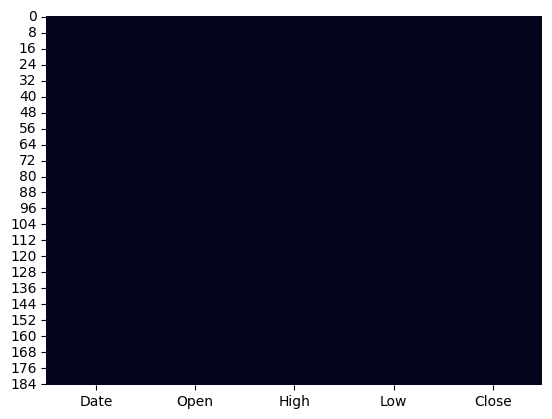

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_yes_bank.isnull(), cbar=False)

### What did you know about your dataset?

1. Dataset contain 185 rows and 5 column. All 5 columns having numeric data.
2. There is no missing data in the dataset.
3. There is no dulicate data in the given dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset_yes_bank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset_yes_bank.describe(include='all')# describe will generate descriptive statistics of each column

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

* **Date:**  It refers to  the month and year of the for a particular stock.
* **Open:**  It refers to the price at which a stock started trading that month.
* **High:**  It refers to the maximum price of stock in that month.
* **Low:**  It refers to the minimum price of stock in that month.
* **Close:** It refers to the final trading price for that month, which I have to predict using regression

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset_yes_bank.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_yes_bank[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# converting Date column from object to date time
dataset_yes_bank['Date'] = pd.to_datetime(dataset_yes_bank['Date'], format='%b-%y')

### What all manipulations have you done and insights you found?

**1. Changed Inappropriate Datatye:**

- Data type for date column was object so I have changed  that to into date data type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### 4. 1 Univariate Analysis

#### Chart - 1 Univariate analysis of "Open" (Numeric)

Text(0.5, 1.0, 'Histogram of Open')

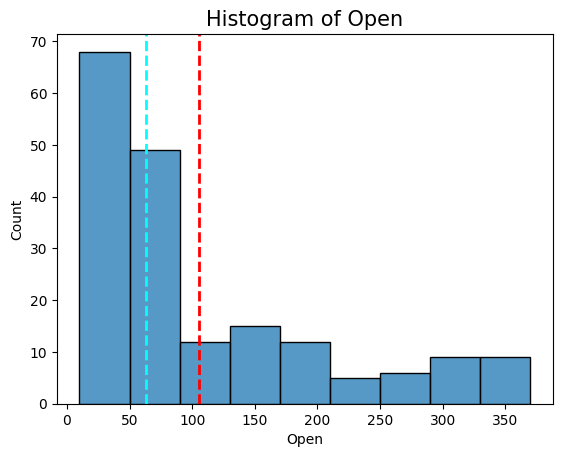

In [ ]:
# Chart - 1 visualization code
#plotting histogram of "Open" column
sns.histplot(data=dataset_yes_bank, x="Open")
plt.axvline(dataset_yes_bank["Open"].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');   #plotting line for mean
plt.axvline(dataset_yes_bank["Open"].median(), color='cyan', linestyle='dashed', linewidth=2,label='median');  #plotting line for median
plt.title("Histogram of Open",fontsize = 15)# title for histogram

##### 1. Why did you pick the specific chart?

A Histogram is used to represent data in the form of group. It shows the distribution of data. It is type of bar chart where X-axis represents the bin ranges while Y axis gives frequency. So in order to check distribution of Open I used histogram.

##### 2. What is/are the insight(s) found from the chart?

1. By looking at above chart , I can say Open is having right/positively skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 2 Univariate analysis of "High" (Numeric)

Text(0.5, 1.0, 'Histogram of High')

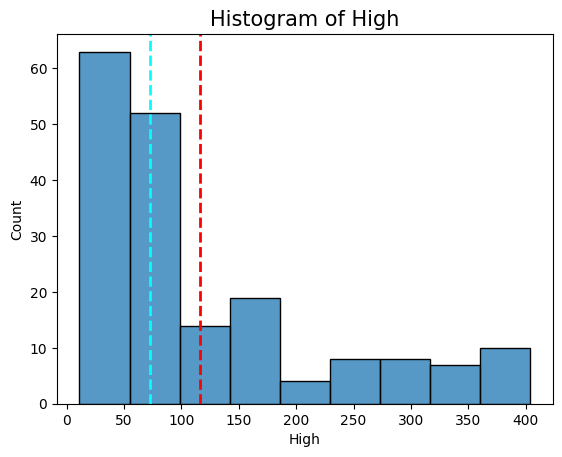

In [ ]:
# Chart - 2 visualization code
#plotting histogram of "High" column
sns.histplot(data=dataset_yes_bank, x="High")
plt.axvline(dataset_yes_bank["High"].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');  #plotting line for mean
plt.axvline(dataset_yes_bank["High"].median(), color='cyan', linestyle='dashed', linewidth=2,label='median');  #plotting line for median
plt.title("Histogram of High",fontsize = 15)# title for histogram

<Axes: xlabel='High'>

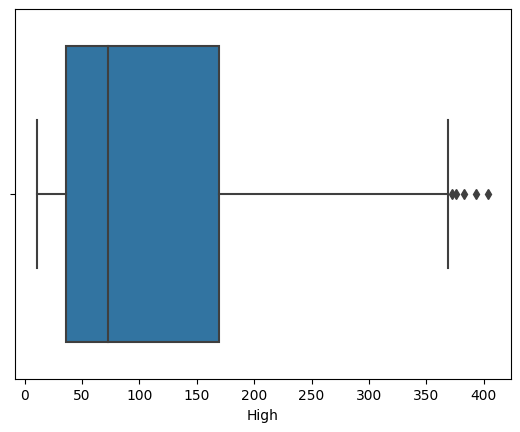

In [ ]:
#plotting Box plot of high
sns.boxplot(data=dataset_yes_bank, x="High")

##### 1. Why did you pick the specific chart?

* A Histogram is used to represent data in the form of group. It shows the distribution of data. It is type of bar chart where X-axis represents the bin ranges while Y axis gives frequency.So in order to check distribution of High I used histogram.
* Box plot gives visual representation of 5 number summary. 5 number summary include minimum, maxiumum, 25th percentile,50th percentile, 75th percentile of particular numerical column.So in order to check 5 number summary of High I used histogram.

##### 2. What is/are the insight(s) found from the chart?

 1. By looking at above chart , I can say High is having right/positively skewed distribution.
 2. Maximum value for "High" is 400.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 3 Univariate analysis of Low (Numeric)

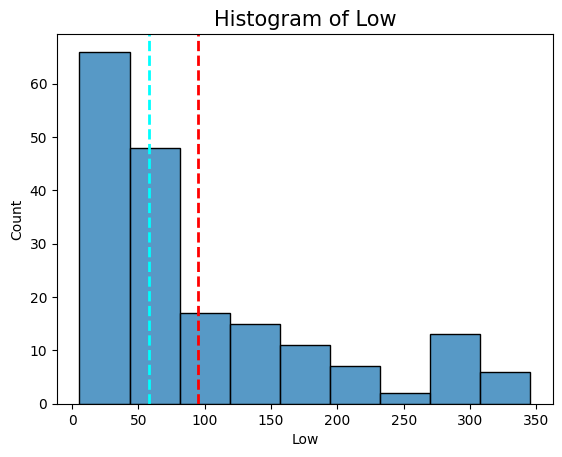

In [ ]:
# Chart - 3 visualization code
#plotting histogram of "Low" column
sns.histplot(data=dataset_yes_bank, x="Low")
plt.title("Histogram of Low",fontsize = 15)# title for histogram
plt.axvline(dataset_yes_bank["Low"].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');   #plotting line for mean
plt.axvline(dataset_yes_bank["Low"].median(), color='cyan', linestyle='dashed', linewidth=2,label='median'); #plotting line for median

##### 1. Why did you pick the specific chart?

* A Histogram is used to represent data in the form of group. It shows the distribution of data. It is type of bar chart where X-axis represents the bin ranges while Y axis gives frequency.So in order to check distribution of Low I used histogram.

##### 2. What is/are the insight(s) found from the chart?

 1. By looking at above chart , I can say High is having right/positively skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 4 Univariate analysis of Close (Numeric)

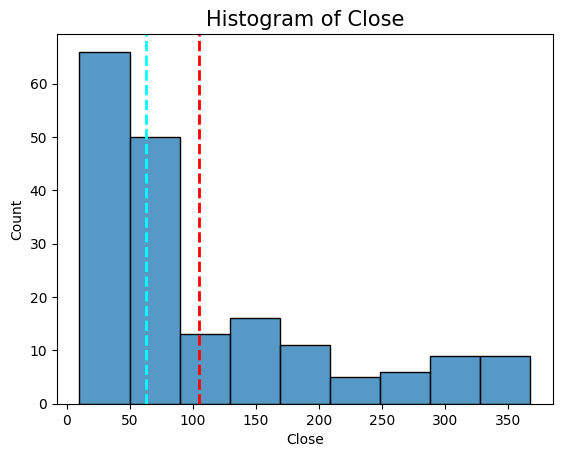

In [ ]:
# Chart - 4 visualization code
# Plotting histogram  for close parameter
sns.histplot(data=dataset_yes_bank, x="Close")
plt.title("Histogram of Close",fontsize = 15)# title for histogram
plt.axvline(dataset_yes_bank["Close"].mean(), color='red', linestyle='dashed', linewidth=2,label= 'mean');   #plotting line for mean
plt.axvline(dataset_yes_bank["Close"].median(), color='cyan', linestyle='dashed', linewidth=2,label='median');#plotting line for median

##### 1. Why did you pick the specific chart?

A Histogram is used to represent data in the form of group. It shows the distribution of data. It is type of bar chart where X-axis represents the bin ranges while Y axis gives frequency.So in order to check distribution of "Close" parameter I used histogram.

##### 2. What is/are the insight(s) found from the chart?

Close is having positively skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently I cannot say about impact on business. But It helps to understand the distribution of data.

### 4. 2 Bivariate Analysis

#### Chart - 5 Date Vs Close ( Bivariate with Date -Numeric)

Text(0.5, 1.0, 'Relationship Between Date and Close')

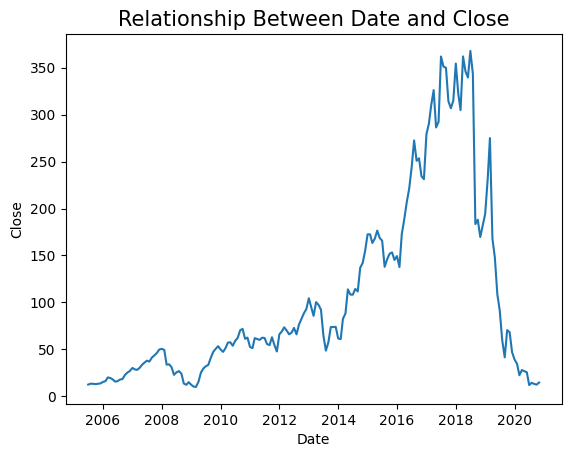

In [ ]:
# Chart - 5 visualization code
#plotting lineplot of "date"  and close column
sns.lineplot(data=dataset_yes_bank, x="Date", y="Close")
plt.title("Relationship Between Date and Close",fontsize = 15)# title for lineplot

##### 1. Why did you pick the specific chart?

To show changes in value, a line chart (also known as a line plot or line graph) connects points using line segments from left to right. The vertical axis displays values for an interest metric along the horizontal axis' continuous progression, which is frequently that of time. So in order to check changes in close over time I used line chart.

##### 2. What is/are the insight(s) found from the chart?

1. By looking at the lineplot. I can see there is continous rise in stock prize from 2009 to 2018. But there is continous downfall from 2018 , this is because of Rana Kapoor fraud case.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Investors use stock price to see whether a company is financially healthy or not?. But by looking at line see it shows that stock prize are decrasing from 2018 , so this is wake up call for bank to deal with closing price problem which influences investor to invest in bank on not. So this insights gives negative impact on Bank.

#### Chart - 6 Open Vs Close (Bivariate with Numeric -Numeric)

Text(0.5, 1.0, 'Scatterplot of Open Vs Close')

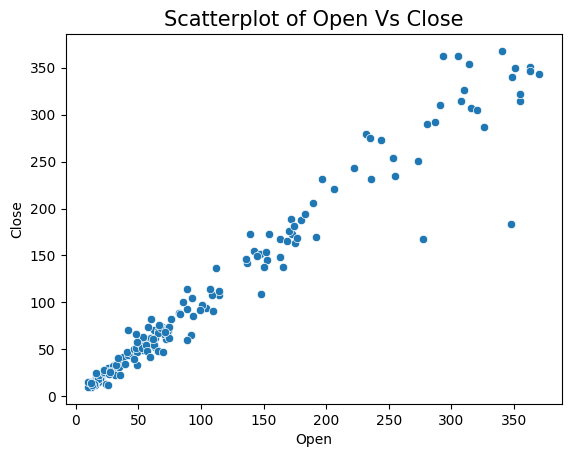

In [ ]:
# Chart - 6 visualization code
#plotting scatterplot against open and close
sns.scatterplot(data=dataset_yes_bank, x="Open", y="Close")
plt.title("Scatterplot of Open Vs Close",fontsize = 15)# title for scatterplot

##### 1. Why did you pick the specific chart?

A scatter plot is a figure where each value in the data set is represented by a dot. It shows how variable is related to each other. So In order to show the relationship between Open and close I choose scatterplot.

##### 2. What is/are the insight(s) found from the chart?

1. By looking at scatterplot , I found "Open" is linearly correlated with "close".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 7 High Vs Close (Bivariate  Numeric- Numeric)

Text(0.5, 1.0, 'Scatterplot of High Vs Close')

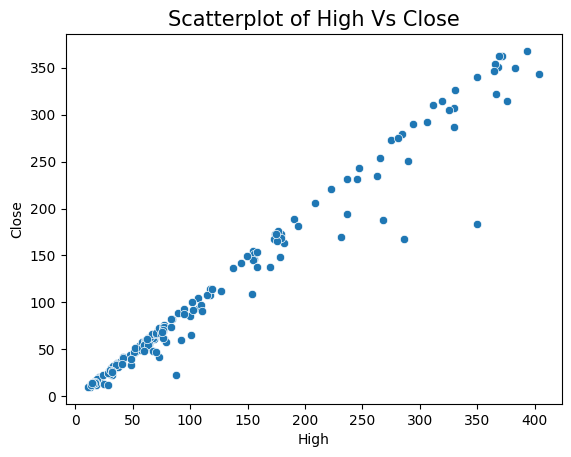

In [ ]:
# Chart - 7 visualization code
#plotting scatterplot against High and close
sns.scatterplot(data=dataset_yes_bank, x="High", y="Close")
plt.title("Scatterplot of High Vs Close",fontsize = 15)# title for scatterplot

##### 1. Why did you pick the specific chart?

A scatter plot is a figure where each value in the data set is represented by a dot. It shows how variable is related to each other. So In order to show the relationship between High and close I choose scatterplot.

##### 2. What is/are the insight(s) found from the chart?

1. By looking at scatterplot , I found "High" is linearly correlated with "close".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 8 Low Vs Close (Bivariate with Numeric- Numeric)

Text(0.5, 1.0, 'Scatterplot of Low Vs Close')

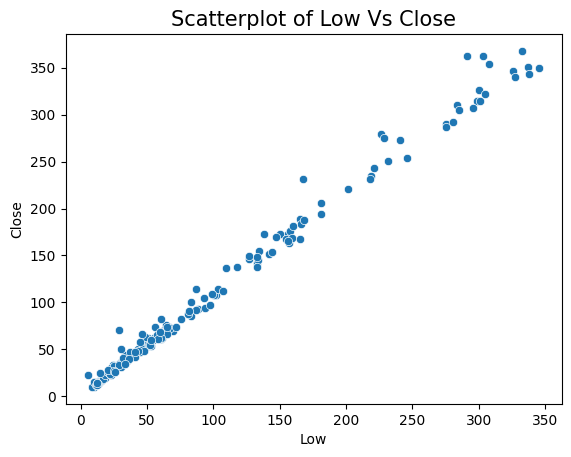

In [ ]:
# Chart - 8 visualization code
#plotting scatterplot against Low and close
sns.scatterplot(data=dataset_yes_bank, x="Low", y="Close")
plt.title("Scatterplot of Low Vs Close",fontsize = 15)# title for scatterplot

##### 1. Why did you pick the specific chart?

A scatter plot is a figure where each value in the data set is represented by a dot. It shows how variable is related to each other. So In order to show the relationship between Low and close I choose scatterplot.

##### 2. What is/are the insight(s) found from the chart?

1. By looking at scatterplot , I found "Low" is linearly correlated with "close".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the chart , I can't say it is creating positive or negative impact on business.

#### Chart - 9 Date vs Open Vs High Vs Low (Multivariate with Numeric-Numeric-Numeric)

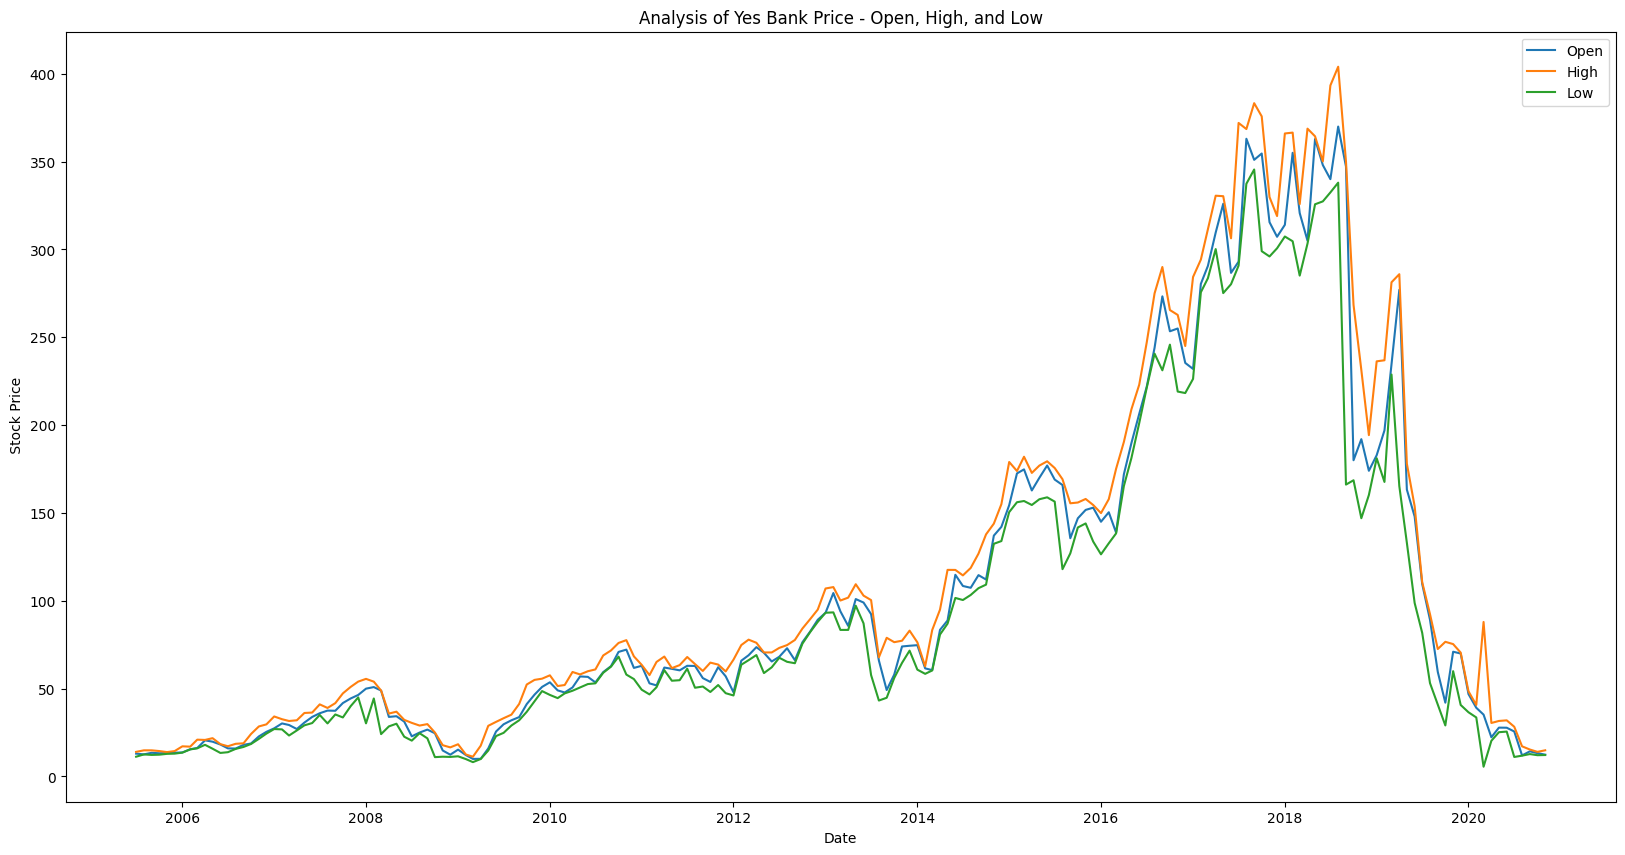

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(20,10)) # setting fig. size
plt.plot(dataset_yes_bank['Date'],dataset_yes_bank['Open'], label='Open') # plot for Date vs Open
plt.plot(dataset_yes_bank['Date'],dataset_yes_bank['High'], label='High')# plot for Date vs High
plt.plot(dataset_yes_bank['Date'],dataset_yes_bank['Low'], label='Low')# plot for Date vs Low
plt.legend()
plt.xlabel('Date')# label for x-axis
plt.ylabel(' Stock Price')# label for y-axis
plt.title('Analysis of Yes Bank Price - Open, High, and Low') #Title for plot
plt.show()

##### 1. Why did you pick the specific chart?

To show changes in value, a line chart (also known as a line plot or line graph) connects points using line segments from left to right. The vertical axis displays values for an interest metric along the horizontal axis' continuous progression, which is frequently that of time. So in order to check changes in Open, Low, High over time I used line chart.

##### 2. What is/are the insight(s) found from the chart?

1. By looking plot , we can say all 3 i.e. open, low , high prices are correlated with each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Open, High, Low, Close are correlated with each other and following similar trends over time.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Co-relation of the columns')

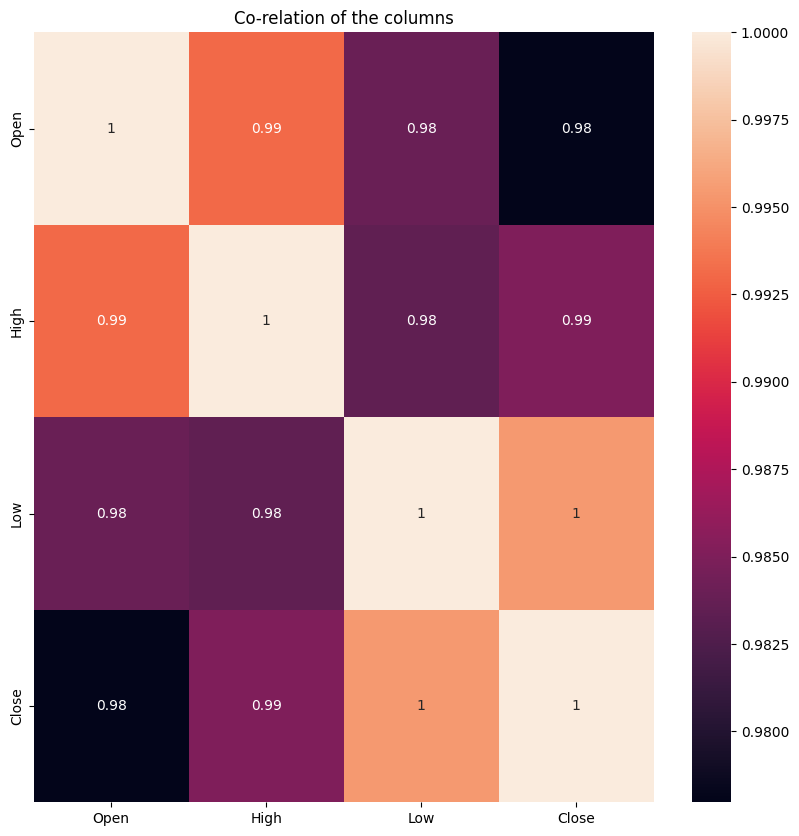

In [ ]:

# Correlation Heatmap visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(10,10)) # setting chart/figure size
sns.heatmap(dataset_yes_bank.corr(),annot=True) # plot heatmap
plt.title('Co-relation of the columns') # plotting title

##### 1. Why did you pick the specific chart?

A correlation matrix is a square matrix showing the correlation coefficients between two variables.The strength and direction of the relationship between two variables in a straight line are determined by the correlation coefficient. In multivariate analysis and statistics, a correlation matrix is typically used to explore the relationships between several variables.

##### 2. What is/are the insight(s) found from the chart?

1. Open , High, Low and close are closely related with each other.

#### Chart - 15 - Pair Plot

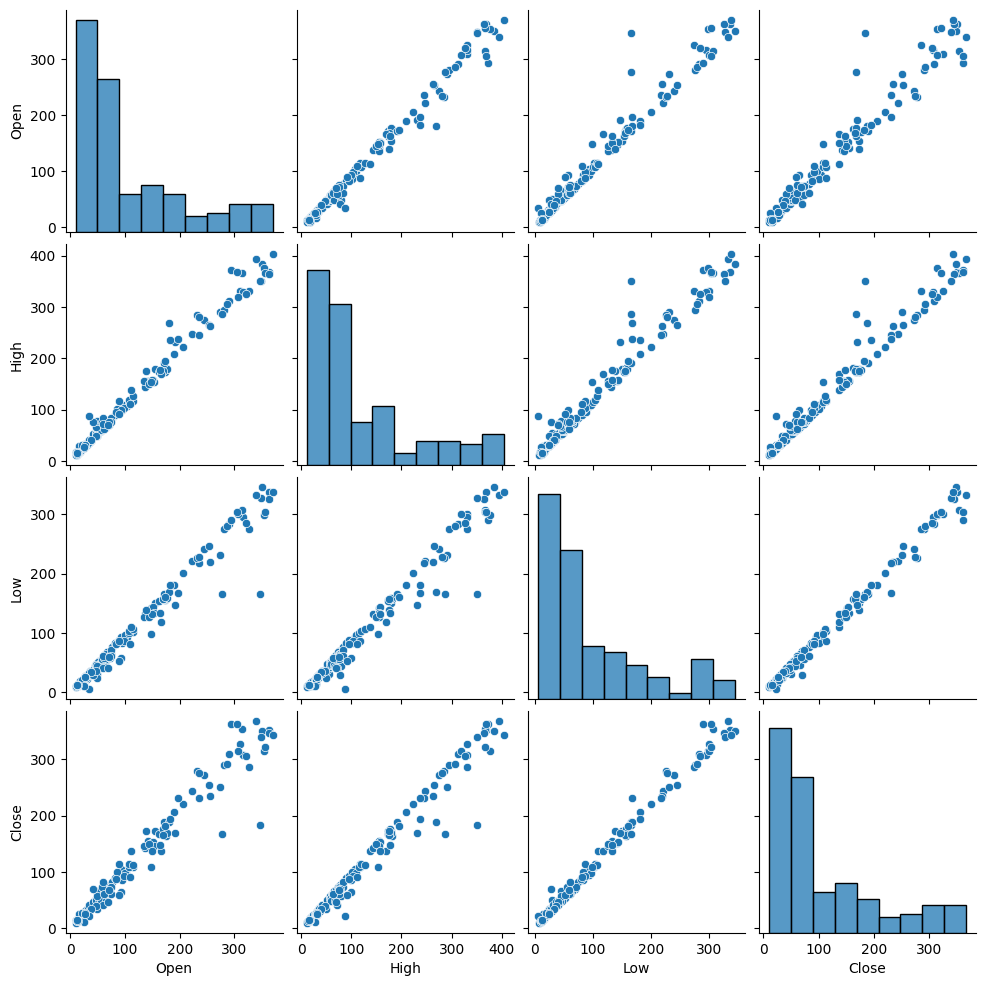

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset_yes_bank)

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best combination of features to describe a connection between two variables. Additionally, it is beneficial to create some straightforward classification models by making linear separations in our data or drawing some simple lines.

##### 2. What is/are the insight(s) found from the chart?

1. All 4 i.e. open, high,low,close column having positively/right skewed distribution.
2. Open, high,low,close column are positively correlated with each other i.e. if one value will increase other value will also increase.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Open and Close is having linear relationship.
2. Close follow normal distribution.
3. The distribution of High and low are equal.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: Open and Close are independent.   

H1: There is a dependency between Open and Close.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

data1_open=dataset_yes_bank['Open'].values.tolist() # taking open data into list
data2_close=dataset_yes_bank['Close'].values.tolist() # taking close data into list
stat, p = pearsonr(data1_open, data2_close) # calculating "P" value.
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
 print('Null hypothesis is accepted i.e. open and close are independent ')
else:
 print('Null Hypothesis is rejected i.e. open and close are dependent')

stat=0.97797, p=0.00000
Null Hypothesis is rejected i.e. open and close are dependent


##### Which statistical test have you done to obtain P-Value?

I have used Pearson Coefficient to obtain P-value.

##### Why did you choose the specific statistical test?

1. As Peorson coefficient is used to find correlation between 2 variable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho:- "Close" column follows normal distributtion.

H1:-"Close" Column does not follow normal distribution.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
data2_close=dataset_yes_bank['Close'].values.tolist()# taking "Close" data into list
stat,p_value = shapiro(data2_close) # calculating "P" value
print('stat=%.5f, p=%.5f' % (stat, p))
if p_value>0.05:
  print('Null hypothesis is accepted as the close variable is Normally Distributed')
else:
  print('Null Hypothesis is rejected as the close variable is not Normally Distributed')

stat=0.81698, p=0.00000
Null Hypothesis is rejected as the close variable is not Normally Distributed


##### Which statistical test have you done to obtain P-Value?

I have used Shapiro-Wilk Test to obtain P-Value.

##### Why did you choose the specific statistical test?

Shapiro-Wilk test is used to check sample is having normal distribution or not.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho:- The distribution of High and low are equal.

H1:- The distribution of High and low arenot equal.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

data1_open=dataset_yes_bank['Open'].values.tolist()# taking open data into list
data2_close=dataset_yes_bank['Low'].values.tolist()# taking low data into list
stat, p = mannwhitneyu(data1_open, data2_close) # calculating "P" Value.
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Null hypothesis is accepted i.e having the same distribution')
else:
 print('Null Hypothesis is rejected  i.e. different distributions')

stat=18538.000, p=0.166
Null hypothesis is accepted i.e having the same distribution


##### Which statistical test have you done to obtain P-Value?

I have used Mann-Whitney U Test to obtain P-Value.

##### Why did you choose the specific statistical test?

Mann-Whitney U Test is nonparametric test used to check whether the distribution of the two independent samples are equal or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Creating a copy of the dataset for further feature engineering
df=dataset_yes_bank.copy()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


<Axes: >

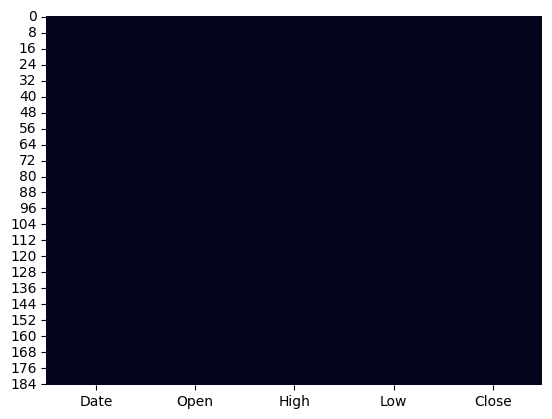

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Yes bank dataset doesn't have missing value so there is no need of imputation technique.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def ToDetect_outlier_IQR(columnname):
 #""" This function will return True if outlier is present using Interquartile range"""
    var =columnname.values
    var = np.sort(var,axis = None)    # sorting  column values

    q1=var[int(len(var)*(float(25)/100))] #Calculating 25th percentile
    q3=var[int(len(var)*(float(75)/100))] #Calculating 75th percentile

    iqr = q3-q1 #Calculating the inter quatile range (IQR)


    lower_fence= q1-(1.5*iqr)#Calculating lower fence
    upper_fence =q3+(1.5*iqr)#Calculating upper fence

   # checking any value is less than lower fence or greater than upper fence
    for val in var:
       if(val<lower_fence or val>upper_fence):
              return True

    return False # otherwise it will return false

In [ ]:
# code to detect outlier
#finding outlier is present in close or not?
outlier_close=ToDetect_outlier_IQR(dataset_yes_bank["Close"])

#finding outlier is present in high or not?
outlier_high=ToDetect_outlier_IQR(dataset_yes_bank["High"])

#finding outlier is present in high or not?
outlier_low=ToDetect_outlier_IQR(dataset_yes_bank["Low"])

#finding outlier is present in high or not?
outlier_open=ToDetect_outlier_IQR(dataset_yes_bank["Open"])

In [ ]:
print(outlier_close,outlier_high,outlier_low,outlier_open)

True True True True


Thus, I Have found that outlier is present in close, high , low, open column.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Inter Quartile range (IQR) method to detect outlier , as the distribution for Open,Low, High, Close was right skewed distribution.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
dataset_yes_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#### What all categorical encoding techniques have you used & why did you use those techniques?

**As there is no column contain categorical data , so no need of categorical encoding.**

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df_numeric=dataset_yes_bank[['Open','High','Low','Close']]

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def calculate_vif(dataset1):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = list(dataset1.columns)[:-1]
    vif["VIF"] = [variance_inflation_factor(dataset1.iloc[:, :-1], i) for i in range(len(dataset1.iloc[:, :-1].columns))]

    return(vif)

calculate_vif(df_numeric)

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* The VIF's for all features are on higher side i.e. features are multicorrelated but I can't remove any feature as we already have very less feature.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# function to find importance of feature in prediction
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  rf=  RandomForestRegressor()
  # Fit the mmodel
  rf.fit(x,y)
  # get the importance of thr resulting features
  importances= rf.feature_importances_
  # Create a data frame for visualization
  df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  df.set_index('Importances')
  # Sort in ascending order to better visualization
  df= df.sort_values('Importances')

  return df

In [ ]:
f_imp=randomforest_embedded(x=df_numeric.drop(['Close'],axis=1),y=df_numeric['Close']) # finding feature importance using random forest regressor

In [ ]:
#printing importance of each feature .
f_imp

,Features,Importances
0,Open,0.049234
1,High,0.188121
2,Low,0.762645


##### What all feature selection methods have you used  and why?

I have used embedded method using random forest classifier to find feature importance. Random forest classifier is highly effective, good predictive power, low overfitting and simple to interpret. Interpretability is determine the significance of each variable on the tree decision.

##### Which all features you found important and why?

I will select all 3  feature as all having some importance in prediction, none of the feature are having zero importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, The data needs to be transformed. I will use log transformation. Log transformation used to transform skwed data to approximately conform to normality.

In [ ]:
# Transform Your data
#transforming data using log transformation
dataset_yes_bank['Open'] = np.log(dataset_yes_bank['Open'])
dataset_yes_bank['High'] = np.log(dataset_yes_bank['High'])
dataset_yes_bank['Low'] = np.log(dataset_yes_bank['Low'])
dataset_yes_bank['Close'] = np.log(dataset_yes_bank['Close'])

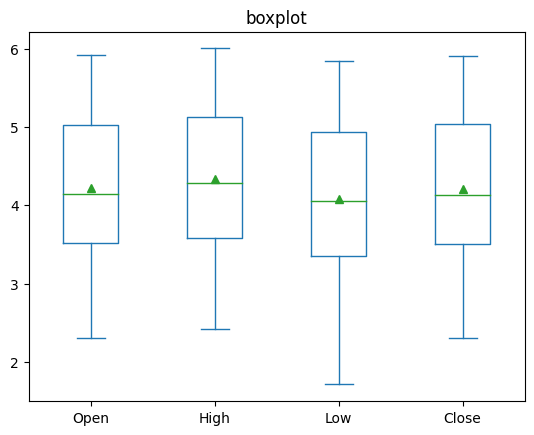

In [ ]:
#plotting box plot after transformation
ax = dataset_yes_bank[['Open', 'High','Low','Close']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

### 6. Data Scaling

In [ ]:
# Scaling your data
dataset_yes_bank.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,4.214781,4.331309,4.083021,4.211144
std,0.981998,0.955810,1.015082,0.982539
min,2.302585,2.419479,1.713798,2.300583
25%,3.520461,3.587400,3.350255,3.510052
50%,4.142817,4.284276,4.060443,4.135806
75%,5.030438,5.131022,4.929787,5.032397
max,5.913368,6.001415,5.844993,5.907811


##### Which method have you used to scale you data and why?

As we can see all column have range is between 1.6 to 5.9. There is no large difference betwwn minimun value and maximum value. So there is no need of scaling data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)
dataset_yes_bank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Dimensionality reduction is not needed for this data as we have only 4 column.**

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# code for spliting the data.


# Create a list of independent variables

# sorting data per date
dataset_yes_bank.sort_values(by='Date',inplace=True)

independent_variables=['Open',"Low","High"]
# Create the data of independent variables
X = dataset_yes_bank[independent_variables]

# Create the dependent variable data
y = dataset_yes_bank["Close"]



# Splitting the dataset into the Training set and Test set in 80:20 ratio
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
limit=int(len(X)*0.8)
X_train=X[:limit+1]# taking 1st 80% of data for  training
y_train=y[:limit+1]# taking 1st 80% of data for  training
X_test=X[limit+1:]# taking last 20% of data for  testing
y_test=y[limit+1:]# taking last 20% of data for  testing

In [ ]:
#printing size of my training and test data.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 3)
(36, 3)
(149,)
(36,)


##### What data splitting ratio have you used and why?

I have used 80:20 ratio for splitting,  as we have already less data 80% data needs model to learn the pattern. I have divide data on the basis of time. First I sort the data on the basis date. Then 1st 80% of data I  kept for training and 20% of data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Mainly data imbalance problem is with classification task. And regression method suffer from outlier problem but for this dataset I have used log transformed to solve outlier issue.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**There is no need of balancing data.**

## ***7. ML Model Implementation***

### ML Model - 1 :- Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predict on the model
y_pred_train = regressor.predict(X_train) #predicting train data
y_pred_test = regressor.predict(X_test)  # predicting test data

In [ ]:
# Checking the coefficients
regressor.coef_

array([-0.46008212,  0.65316411,  0.81352018])

In [ ]:
# Checking the intercept value
regressor.intercept_

-0.030948879725002598

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Train performance
mse_train=mean_squared_error(y_train, y_pred_train) # calculating mean squared error for train data.
R2_train=r2_score(y_train, y_pred_train)# calculating r2 score for train data.
MAPE_train=mean_absolute_percentage_error(y_train, y_pred_train)# calculating MAPE for train data.

# Test performance
mse_test=mean_squared_error(y_test, y_pred_test)# calculating mean squared error for test data.
R2_test=r2_score(y_test, y_pred_test)# calculating r2 score for test data.
MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test)# calculating MAPE for test data.


print("********************")
print("Train Performance")
print("MSE on train",round(mse_train,4))
print("R2 score",round(R2_train,4))
print("MAPE on train",round(MAPE_train,4))
print("********************")

print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))
print("R2 score",round(R2_test,4))
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.003
R2 score 0.9965
MAPE on train 0.0106
********************
********************
Test Performance
MSE on test 0.0133
R2 score 0.9902
MAPE on test 0.0204
********************


In [ ]:
#taking performance of linear regression into dataframe
df1=pd.DataFrame({"Model":['Linear Regression'],"MSE":[round(mse_test,4)],
                        "R2-Score":[round(R2_test,4)],"MAPE":[round(MAPE_test,4)]})

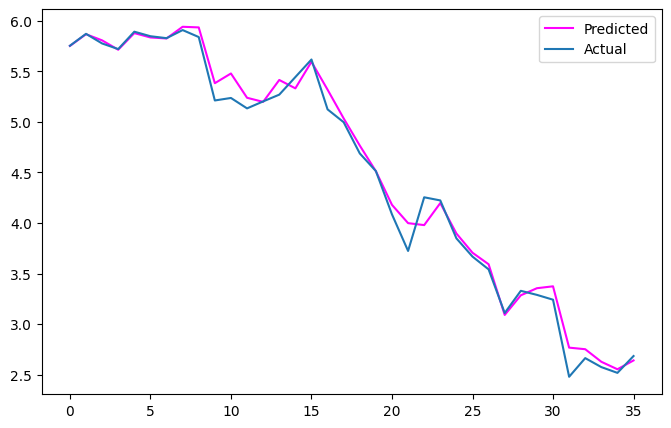

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test) , color ='magenta') #plotting predicted close value for test data
plt.plot(np.array((y_test))) #plotting actual close value
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
def Hyparameter_tunning(param,xtrain,ytrain,xtest,model):
     #regressor = LinearRegression()
     linear_rsc=GridSearchCV(model, param_grid=param,cv=3,scoring='neg_mean_squared_error')

     # Fit the Algorithm
     linear_rsc.fit(xtrain,ytrain)
     # Predict on the model
     y_train_pred=linear_rsc.predict(xtrain)
     y_test_pred=linear_rsc.predict(xtest)

     print("********************")
     print("Train Performance")
     mse_train=(mean_squared_error(ytrain, y_train_pred))  # calculating mean squared error for train data.
     print("MSE on train",round(mse_train,4))
     R2_train=r2_score(ytrain, y_train_pred)  # calculating r2 score for train data.
     print("R2 score",round(R2_train,4))

     MAPE_train=mean_absolute_percentage_error(y_train, y_pred_train)  # calculating MAPE for train data.
     print("MAPE on train",round(MAPE_train,4))

     print("********************")
     return y_test_pred , linear_rsc


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


parameters={'fit_intercept':[True,False], 'copy_X':[True,False], 'n_jobs':[1,2,3,4,5,6,7,8,9,10], 'positive':[True,False]}
# Fit the Algorithm
y_test_pred,best_linear=Hyparameter_tunning(parameters,X_train, y_train,X_test,regressor)
# Predict on the model
# Test performance
mse_test=(mean_squared_error(y_test, y_test_pred)) # calculating mean squared error for test data.
print("********************")
print("Test Performance")
# calculating mean squared error for test data.
print("MSE on test",round(mse_test,4))

# calculating r2 score for test data.
R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.
print("R2 score",round(R2_test,4))

# calculating MAPE for test data.
MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.
print("MAPE on test",round(MAPE_test,4))
print("********************")


********************
Train Performance
MSE on train 0.003
R2 score 0.9964
MAPE on train 0.0106
********************
********************
Test Performance
MSE on test 0.0129
R2 score 0.9902
MAPE on test 0.0204
********************


##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

********************
Train Performance

MSE:- 0.003

R2 score:- 0.9965

MAPE:- 0.0106
********************
********************
Test Performance

MSE :- 0.0133

R2 score:- 0.9902

MAPE :- 0.0204
********************
********************
**After Hyperparameter tunning**
********************
Train Performance

MSE:- 0.003

R2 score:- 0.9965

MAPE:- 0.0106
********************
********************
Test Performance

MSE :- 0.0133

R2 score:- 0.9902

MAPE :- 0.0204
********************
As we can see there is no improvement in mean squared error , R2 score, mean absolute percentage error after hyperparameter tunning.

### ML Model - 2 Random Forest Regressor

In [ ]:
# fitting traing data using random forest
regr_randomforest = RandomForestRegressor()
regr_randomforest.fit(X_train, y_train)
# Predict on the model
y_pred_train = regr_randomforest.predict(X_train)
y_pred_test = regr_randomforest.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Train performance
mse_train=(mean_squared_error(y_train, y_pred_train))   # calculating mean squared error for train data.

# Test performance
mse_test=(mean_squared_error(y_test, y_pred_test))# calculating mean squared error for test data.

R2_train=r2_score(y_train, y_pred_train) # calculating r2 score for train data.


R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.

MAPE_train=mean_absolute_percentage_error(y_train, y_pred_train) # calculating MAPE for train data.

MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.

print("********************")
print("Train Performance")
print("MSE on train",round(mse_train,4))
print("R2 score",round(R2_train,4))
print("MAPE on train",round(MAPE_train,4))
print("********************")

print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))
print("R2 score",round(R2_test,4))
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0013
R2 score 0.9985
MAPE on train 0.0067
********************
********************
Test Performance
MSE on test 0.0349
R2 score 0.9743
MAPE on test 0.0335
********************


In [ ]:
#taking performance of random forest into dataframe
df2=pd.DataFrame({"Model":['Random Forest'],"MSE":[round(mse_test,4)],
                        "R2-Score":[round(R2_test,4)],"MAPE":[round(MAPE_test,4)]})


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
n_estimators = [50,80,100, 150, 200, 250, 300]

# Maximum depth of trees
max_depth = [1, 2, 3,4,6,8]

# Minimum number of samples required to split a node
# min_samples_split = [50,100,150]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [40,50]

# HYperparameter Grid
parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}
              # 'min_samples_split' : min_samples_split,
              # 'min_samples_leaf' : min_samples_leaf}

#parameters={'max_depth': [1, 2, 3, 4], 'n_estimators': [100, 150, 200, 250, 300],}
# Fit the Algorithm
y_test_pred,best_randomforest=Hyparameter_tunning(parameters,X_train, y_train,X_test,regr_randomforest)
# Predict on the model
# Test performance
mse_test=(mean_squared_error(y_test, y_test_pred))
print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))

# calculating r2 score for test data.
R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.
print("R2 score",round(R2_test,4))

# calculating MAPE for test data.
MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0012
R2 score 0.9985
MAPE on train 0.0067
********************
********************
Test Performance
MSE on test 0.0368
R2 score 0.9743
MAPE on test 0.0335
********************


In [ ]:
# code for finding faure importnace using random forest
importances = regr_randomforest.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Low,0.53
2,High,0.39
0,Open,0.09


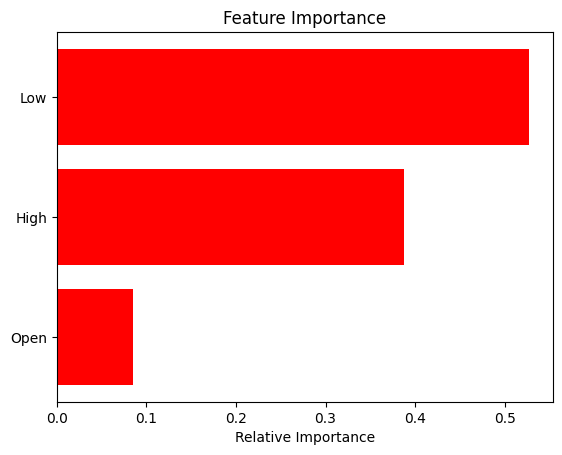

In [ ]:
# code for visualizing importance of feature using bar chart
features = X_train.columns
importances = regr_randomforest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

********************
Train Performance
MSE :- 0.0012

R2 score :- 0.9986

MAPE :- 0.0065
********************
********************
Test Performance

MSE :- 0.0416

R2 score :-0.9694

MAPE:- 0.0348
********************
**After hyperparameter tunning with Gridsearch Cv=3**
********************
Train Performance

MSE :- 0.0016

R2 score :- 0.9981

MAPE :- 0.0067
********************
********************
Test Performance

MSE:- 0.0362

R2 score :- 0.9731

MAPE  :- 0.0328
********************
By looking at above result I can say there is no improvement in MSE, R2 Score,MAPE.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Mean squared error is the mean of squared difference between expected value and predicted value.

### ML Model - 3 XGBoost Regressor

In [ ]:
# ML Model - 3 Implementation
# fitting the training data using xgboost regressor

regr_xgbregressor = xgb.XGBRegressor()

regr_xgbregressor.fit(X_train, y_train)
# Predict on the model
y_pred_train = regr_xgbregressor.predict(X_train)
y_pred_test = regr_xgbregressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Train performance
mse_train=(mean_squared_error(y_train, y_pred_train))  # calculating mean squared error for train data.

# Test performance
mse_test=(mean_squared_error(y_test, y_pred_test))# calculating mean squared error for test data.

R2_train=r2_score(y_train, y_pred_train) # calculating r2 score for train data.

R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.

MAPE_train=mean_absolute_percentage_error(y_train, y_pred_train) # calculating MAPE for train data.

MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.

print("********************")
print("Train Performance")
print("MSE on train",round(mse_train,4))
print("R2 score",round(R2_train,4))
print("MAPE on train",round(MAPE_train,4))
print("********************")

print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))
print("R2 score",round(R2_test,4))
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0
R2 score 1.0
MAPE on train 0.0003
********************
********************
Test Performance
MSE on test 0.0348
R2 score 0.9744
MAPE on test 0.0281
********************


In [ ]:
#taking performance of Xgboost model into dataframe
df3=pd.DataFrame({"Model":['XGBoost'],"MSE":[round(mse_test,4)],
                        "R2-Score":[round(R2_test,4)],"MAPE":[round(MAPE_test,4)]})


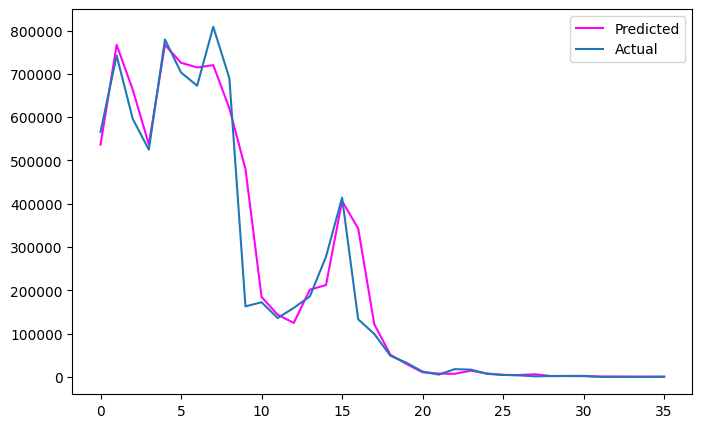

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test) , color ='magenta') # pplotting predicted test data using xgboost
plt.plot(np.array(10**(y_test)))# plotting actual data
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

parameters={'max_depth': [1, 2, 3, 4], 'n_estimators': [100, 150, 200, 250, 300],'learning_rate': [.03, 0.05, .07]}
# Fit the Algorithm
y_test_pred,best_xgb=Hyparameter_tunning(parameters,X_train, y_train,X_test,regr_xgbregressor)
# Predict on the model
# Test performance
print("Test Performance")
print("MSE on test",round(mse_test,4))

# calculating r2 score for test data.
R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.
print("R2 score",round(R2_test,4))

# calculating MAPE for test data.
MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0001
R2 score 0.9999
MAPE on train 0.0003
********************
Test Performance
MSE on test 0.0348
R2 score 0.9744
MAPE on test 0.0281
********************


##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

********************
Train Performance

MSE :- 0.0

R2 score:- 1.0

MAPE:- 0.0003
********************
********************
Test Performance
MSE:- 0.0348

R2 score :-0.9744

MAPE:- 0.0281
********************
After using hyperparameter optimization technique
********************

Train Performance

MSE:- 0.0001

R2 score :- 0.9999

MAPE:- 0.0003
********************

Test Performance

MSE :- 0.0348

R2 score :- 0.9744

MAPE:- 0.0281

MAPE:- 0.02805083169475954

By looking at above performance I can say there is no any improvement after hyperparameter tunning.


### ML Model - 4 Decision Tree Regressor

In [ ]:
# fitting traing data using decision tree regressor
regr_decisiontree = DecisionTreeRegressor()
regr_decisiontree.fit(X_train, y_train)
# Predict on the model
y_pred_train = regr_decisiontree.predict(X_train)
y_pred_test = regr_decisiontree.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Train performance
mse_train=(mean_squared_error(y_train, y_pred_train))  # calculating mean squared error for train data.

# Test performance
mse_test=(mean_squared_error(y_test, y_pred_test)) # calculating mean squared error for test data.

R2_train=r2_score(y_train, y_pred_train) # calculating r2 score for train data.

R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.

MAPE_train=mean_absolute_percentage_error(y_train, y_pred_train) # calculating MAPE for train data.

MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.

print("********************")
print("Train Performance")
print("MSE on train",round(mse_train,4))
print("R2 score",round(R2_train,4))
print("MAPE on train",round(MAPE_train,4))
print("********************")

print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))
print("R2 score",round(R2_test,4))
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0
R2 score 1.0
MAPE on train 0.0
********************
********************
Test Performance
MSE on test 0.0707
R2 score 0.9479
MAPE on test 0.0391
********************


In [ ]:
#taking performance of data into dataframe
df4=pd.DataFrame({"Model":['Decision Tree'],"MSE":[round(mse_test,4)],
                        "R2-Score":[round(R2_test,4)],"MAPE":[round(MAPE_test,4)]})


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
# Fit the Algorithm
y_test_pred,best_randomforest=Hyparameter_tunning(parameters,X_train, y_train,X_test,regr_decisiontree)
# Predict on the model
# Test performance
mse_test=(mean_squared_error(y_test, y_test_pred)) # calculating mean squared error for test data.
print("********************")
print("Test Performance")
print("MSE on test",round(mse_test,4))

# calculating r2 score for test data.
R2_test=r2_score(y_test, y_pred_test) # calculating r2 score for test data.
print("R2 score",round(R2_test,4))

# calculating MAPE for test data.
MAPE_test=mean_absolute_percentage_error(y_test, y_pred_test) # calculating MAPE for test data.
print("MAPE on test",round(MAPE_test,4))
print("********************")

********************
Train Performance
MSE on train 0.0204
R2 score 0.9757
MAPE on train 0.0
********************
********************
Test Performance
MSE on test 0.122
R2 score 0.9479
MAPE on test 0.0391
********************


In [ ]:
#calculating feature importance using decision tree
importances = regr_decisiontree.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],4)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Low,0.6748
2,High,0.3235
0,Open,0.0017


In [ ]:
features = X_train.columns
importances = regr_decisiontree.feature_importances_ #finding feature importance
indices = np.argsort(importances) # sorting importance of feature

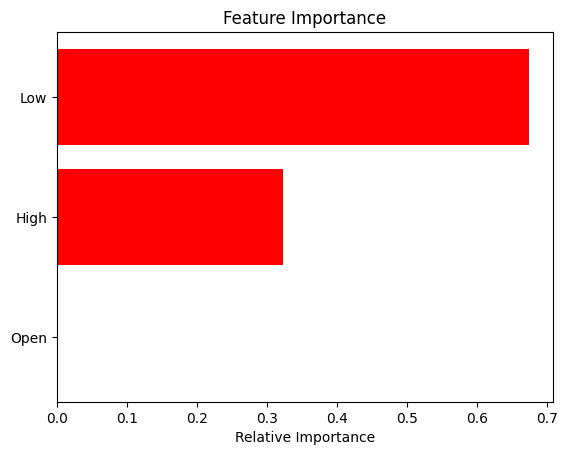

In [ ]:
#code for plotting bar chart of feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')# ploting horizontal bar plot for feature importance
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')# xlabel for chart

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here , I have used GridSearchCV technique for hyperparameter optimization. Grid Search technique for finding the optimal hyperparameters to increase the model performance. Our 1st goal is to find best hyperparameters values to get the perfect prediction results from the model.

Grid Search assesses the performance for each possible combination of the hyperparameters and their values, chooses the combination with the best performance, and takes that combination as its starting point.

In GridearchCV, along with Grid Search, cross validation is also performed, so that I have used GridsearchCv method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

********************
Train Performance
MSE on train 0.0

R2 score 1.0

MAPE on train 0.0
********************
********************
Test Performance

MSE on test 0.0623

R2 score 0.9541

MAPE on test 0.0366
********************
**After hyperparameter tunning with Gridsearch Cv=3**
********************
Train Performance

MSE on train 0.0201

R2 score 0.976

MAPE on train 0.0
********************
********************
Test Performance

MSE on test 0.1109

R2 score 0.9541

MAPE on test 0.0366

********************
By looking at above result I can say there is no improvement in MSE, R2 Score

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Mean squared error is the mean of squared difference between expected value and predicted value.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will use mean squared error as evaluation metric.

In [ ]:
df_perforrmance = pd.concat([df1, df2, df3,df4], axis=0, ignore_index=True) # concatening all performance dataframe into one

In [ ]:
df_perforrmance

,Model,MSE,R2-Score,MAPE
0,Linear Regression,0.0133,0.9902,0.0204
1,Random Forest,0.0349,0.9743,0.0335
2,XGBoost,0.0348,0.9744,0.0281
3,Decision Tree,0.0707,0.9479,0.0391


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the above chart ,I can say ,I will use linear regression model as my data is linear. Also linear regression is simple to implement, & it is not time consuming. Also my dataset is performing well on linear regression model. I am getting less mean square error, mean absolute percentage error and good R2 Score compared to other.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  rf=  RandomForestRegressor()
  # Fit the mmodel
  rf.fit(x,y)
  # get the importance of thr resulting features
  importances= rf.feature_importances_
  # Create a data frame for visualization
  df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  df.set_index('Importances')
  # Sort in ascending order to better visualization
  df= df.sort_values('Importances')

  return df

In [ ]:
f_imp=randomforest_embedded(x=X,y=y) # calculating feature importance

In [ ]:
print(f_imp)

  Features  Importances
0     Open     0.056169
2     High     0.162360
1      Low     0.781472


I have used embedded method using random forest classifier to find feature importance. Random forest classifier is highly effective, good predictive power, low overfitting and simple to interpret. Interpretability is determine the significance of each variable on the tree decision.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

best_model =regressor
filename = 'bestmodel.pkl'


with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open(filename, 'rb') as f:
      model = pickle.load(f)


model.predict(X_test) # predicting on test data


array([5.75095021, 5.86708518, 5.80596905, 5.7136352 , 5.87789053,
       5.83487142, 5.82482955, 5.94038685, 5.934093  , 5.38272001,
       5.47872805, 5.23866708, 5.19796533, 5.41462063, 5.33180469,
       5.5943021 , 5.31872703, 5.03482175, 4.76639982, 4.51279764,
       4.18007084, 3.99928641, 3.98000524, 4.19775402, 3.89719642,
       3.70690687, 3.59298736, 3.09201028, 3.28617071, 3.35613319,
       3.3749317 , 2.76880806, 2.75312292, 2.62905034, 2.55498633,
       2.64232832])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, every feature and variable in the dataset are important and help in predicting close prize. However, several very important characteristics can be identified, such as:

1) From 2009 to 2018, I can see that stock prices have increased steadily. But since 2018, there has been a steady decline, which is attributable to the Rana Kapoor fraud case.

2) Open, close, low, high all 4 having right skewed distribution.


3)Using log transformation , I converted into normal distribution.

4)Also Open, close, low, high all 4 highly correlated with each other.

5) In order to predict close value I have developed 4 regression model using linear regreesion, Random forest,Xgboost and decision tree. Among all 4 model linear regreesion model is performing better compared to rest 3 model.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***